In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import re
startup_df = pd.read_csv('Startups1.csv', low_memory=False)
startup_df.head()

,Unnamed: 0,Company,City,Starting Year,Founders,Industries,Description,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,0,Urban Company,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan","Apps, Home Services, Marketplace, Service Indu...",Urban is a marketplace for independent contrac...,1001-5000,445920356,12,16
1,1,Classplus,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, N...","B2B, E-Learning, EdTech, Education, Mobile App...",Classplus is a mobile-first SaaS platform that...,101-250,89506451,10,20
2,2,Paytm,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma","E-Commerce, Finance, Financial Services, Inter...",Paytm is a payment gateway that allows users a...,501-1000,32448851,4,4
3,3,Apna,Mumbai,2019,Nirmit Parikh,"Employment, Human Resources, Recruiting, Staff...",Apna is a professional networking and job-sear...,101-250,93450000,4,6
4,4,Razorpay,Bengaluru,2014,"Harshil Mathur, Shashank Kumar","Financial Services, FinTech, Payments, Software","Razorpay is a payment acceptance, processing, ...",1001-5000,366600000,7,29


In [3]:
startup_df.shape

(300, 11)

In [4]:
startup_df.dtypes

Unnamed: 0              int64
Company                object
City                   object
Starting Year           int64
Founders               object
Industries             object
Description            object
No. of Employees       object
Funding Amount in $     int64
Funding Round           int64
No. of Investors        int64
dtype: object

In [5]:
#removing columns that i will probably not be using
before = startup_df.shape[1]
print(f'the number of columns before they are removed is {before} total')

#first reset the index of the data
startup_df = startup_df.reset_index(drop=True)

#irrelevant columns include founders. descriptions

startup_df = startup_df.drop(['Founders', 'Description'], axis = 1)
n = startup_df.shape[1]
print(f'the number of columns remaining {n}')

the number of columns before they are removed is 11 total
the number of columns remaining 9


In [6]:
#are there any startup that didnt get any funding?
startup_df['Funding Amount in $'].min()

0

In [7]:
missing_data = startup_df.isnull().sum()
print (missing_data)

Unnamed: 0             0
Company                0
City                   0
Starting Year          0
Industries             0
No. of Employees       0
Funding Amount in $    0
Funding Round          0
No. of Investors       0
dtype: int64


In [8]:
missing_data = startup_df.isnull().sum()
print (missing_data)

Unnamed: 0             0
Company                0
City                   0
Starting Year          0
Industries             0
No. of Employees       0
Funding Amount in $    0
Funding Round          0
No. of Investors       0
dtype: int64


In [9]:
print('total number of companies:', len(set(startup_df['Company'].unique())))
print('total number of cities:', len(set(startup_df['City'].unique())))
print('total number of industries:', len(set(startup_df['Industries'].unique())))
print('total number of funding rounds:', len(set(startup_df['Funding Round'].unique())))
#print('total number of Descriptions:', len(set(startup_df['Description'].unique())))

total number of companies: 300
total number of cities: 24
total number of industries: 290
total number of funding rounds: 24


In [10]:
unique_cities = startup_df['City'].unique()
unique_funding_rounds = startup_df['Funding Round'].unique()

print(unique_cities)
print(unique_funding_rounds)

['Gurgaon' 'Noida' 'Mumbai' 'Bengaluru' 'Kormangala' 'Hyderabad'
 'New Delhi' 'Thane' 'Pune' 'Chennai' 'Andheri' 'Delhi' 'Patna City'
 'Haryana' 'Faridabad' 'Ahmedabad' 'Surat' 'Kolkata' 'Sohna' 'Whitefield'
 'Kilpauk' 'Azadpur' 'Nungambakkam' 'Jaipur']
[12 10  4  7 11 16 17  8 25  6  5  3 13 15 18  2  9 24 20  1 21 23 14  0]


In [11]:
#removing any startup that has zerofunding rounds and funding amount
# Filter the data to include only startups with funding
startup_df = startup_df[(startup_df['Funding Round'] > 0) & (startup_df['Funding Amount in $'] > 0)]
startup_df.shape

(299, 9)

In [12]:
startup_df['Count']=1

plot_data = startup_df.groupby(['City'], as_index=False).Count.sum()
plot_data

,City,Count
0,Ahmedabad,4
1,Andheri,1
2,Azadpur,1
3,Bengaluru,122
4,Chennai,6
5,Delhi,3
6,Faridabad,2
7,Gurgaon,47
8,Haryana,3
9,Hyderabad,5


In [13]:
# Grouping it by industry and city
plot_data2 = startup_df.groupby(['City', 'Industries'], as_index=False).Count.sum()
plot_data2

,City,Industries,Count
0,Ahmedabad,"B2B, B2C, E-Learning, EdTech, Marketplace",1
1,Ahmedabad,"Electric Vehicle, Mobile Apps, Ride Sharing",1
2,Ahmedabad,"Finance, FinTech, Payments, Property Developme...",1
3,Ahmedabad,"Finance, Financial Services, FinTech, Lending,...",1
4,Andheri,Education,1
...,...,...,...
290,Sohna,"Agriculture, Delivery Service, Food and Bevera...",1
291,Surat,"Gaming, Sports",1
292,Thane,"Construction, E-Commerce, Marketplace, Procure...",1
293,Thane,"FinTech, Payments",1


In [14]:
# Grouping it by funding round and city
plot_data3 = startup_df.groupby(['City', 'Funding Round'], as_index=False).Count.sum()
plot_data3

,City,Funding Round,Count
0,Ahmedabad,1,1
1,Ahmedabad,4,1
2,Ahmedabad,5,1
3,Ahmedabad,12,1
4,Andheri,2,1
...,...,...,...
93,Sohna,9,1
94,Surat,3,1
95,Thane,1,1
96,Thane,7,1


#DATA VIUALIZATION

# DATA VISUALIZATION

In [15]:
# different startups and their funding amount
# how many startups have their funding amount more than 100000
x = startup_df['Funding Amount in $'].max()
n = startup_df['Funding Amount in $'].min()

print(x)
print(n)


24767620475
42000


In [16]:
startup_df['Funding Amount in $'].describe()

count    2.990000e+02
mean     3.159186e+08
std      1.631430e+09
min      4.200000e+04
25%      1.442015e+07
50%      4.125547e+07
75%      1.322959e+08
max      2.476762e+10
Name: Funding Amount in $, dtype: float64

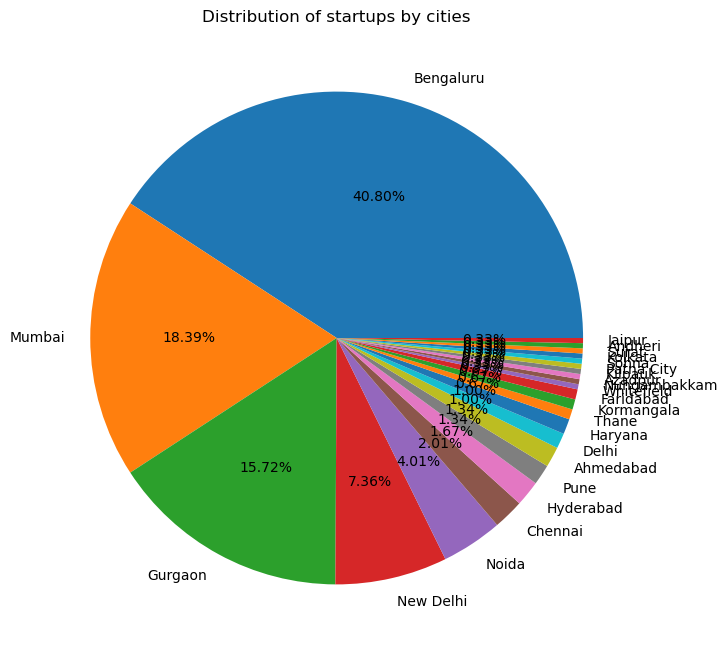

In [17]:
#extract city column from the dataframe
cities = startup_df['City']

#count hte no of occurences of each city in the column
city_counts = cities.value_counts()

#create the pie chart using matplotlib- a figure and axis object
fig, py = plt.subplots(figsize = (8, 8))

#create the pie chart
py.pie(city_counts.values, labels=city_counts.index, autopct='%1.2f%%')

#title
py.set_title('Distribution of startups by cities')
plt.xticks(rotation = 45)
plt.show()

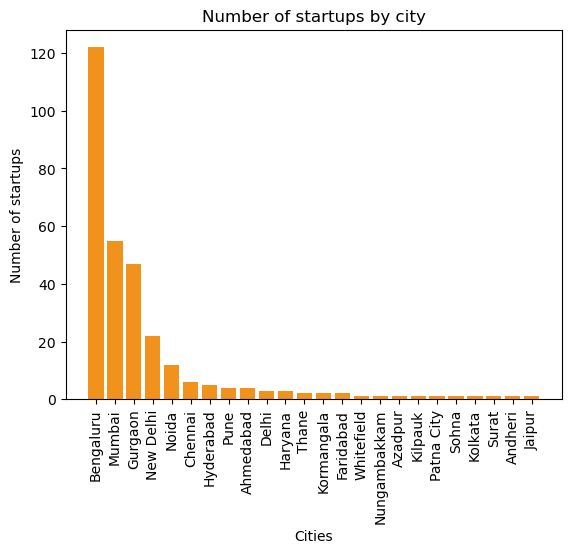

In [18]:
#lets use a bar plot for the distribution
#create a figure and axis object
fig, br = plt.subplots()

#create the bar plot
br.bar(city_counts.index, city_counts.values, color='#F0921C')

#rotate x-axiz labels to avoid overlapping
plt.xticks(rotation = 90)

#add labels and title to the plot
br.set_xlabel('Cities')
br.set_ylabel('Number of startups')
br.set_title('Number of startups by city')

plt.show()

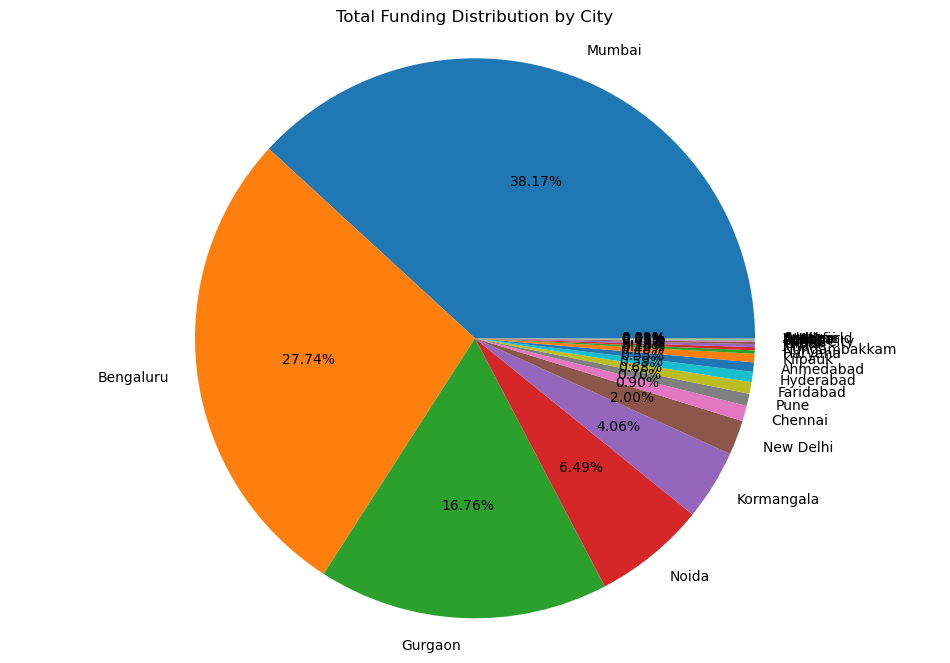

In [19]:

city_funding_sum = startup_df.groupby('City')['Funding Amount in $'].sum()

city_funding_sum_sorted = city_funding_sum.sort_values(ascending=False)

# Create a pie chart
plt.figure(figsize=(12, 8))
plt.pie(city_funding_sum_sorted, labels=city_funding_sum_sorted.index, autopct='%1.2f%%')
plt.title('Total Funding Distribution by City')
plt.axis('equal')  
plt.show()

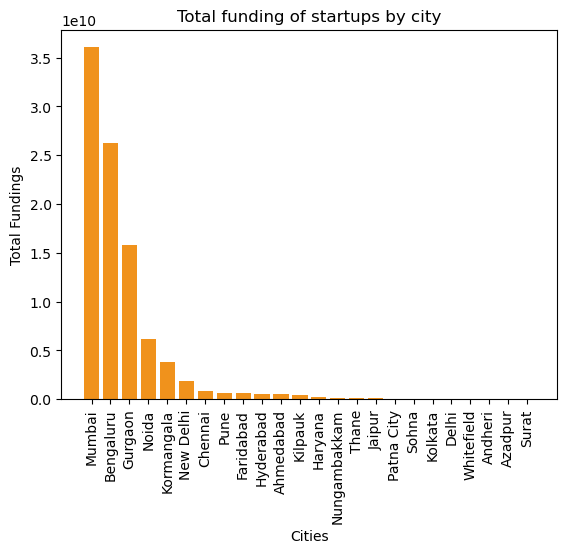

In [20]:
city_funding_sum = startup_df.groupby('City')['Funding Amount in $'].sum()

city_funding_sum_sorted = city_funding_sum.sort_values(ascending=False)

fig, br = plt.subplots()


#create the bar plot
br.bar(city_funding_sum_sorted.index, city_funding_sum_sorted.values, color='#F0921C')

#rotate x-axiz labels to avoid overlapping
plt.xticks(rotation = 90)

#add labels and title to the plot
br.set_xlabel('Cities')
br.set_ylabel('Total Fundings')
br.set_title('Total funding of startups by city')


plt.show()

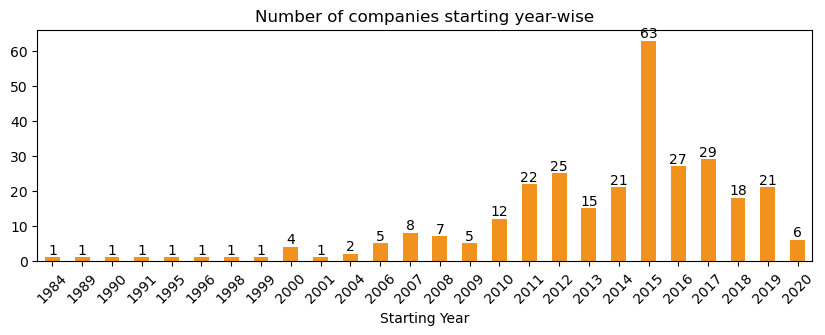

In [30]:
plt.figure(figsize = (10, 3))
ax = startup_df.groupby('Starting Year')['Company'].count().plot(kind = 'bar', title = 'Number of companies starting year-wise', color='#F0921C')
plt.xticks(rotation = 45)
labels = (startup_df.groupby('Starting Year')['Company'].count()).values
ax.bar_label(ax.containers[0], labels = labels, label_type = "edge")
plt.show()

In [27]:
p1=startup_df["Funding Round"].sort_values(ascending=False).head(10)
p1.index

Index([11, 41, 113, 107, 80, 181, 50, 23, 8, 239], dtype='int64')

In [29]:
p2=startup_df.loc[[11, 41, 113, 107, 50, 181, 80, 23, 239, 8],'Company']

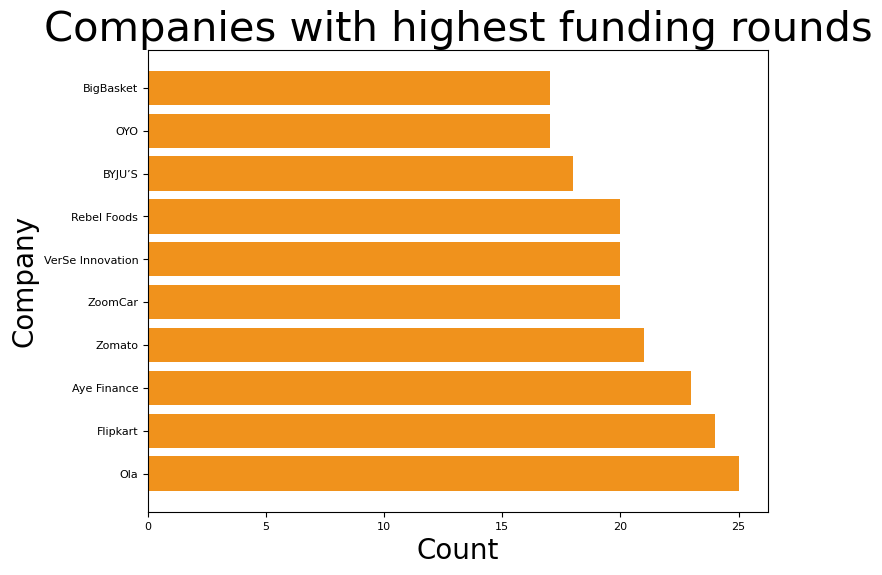

In [39]:
plt.figure(figsize=(8,6))
plt.barh(p2,p1,alpha=1, color='#F0921C')  
plt.title('Companies with highest funding rounds',fontsize=30)    #Note labelling the data
plt.ylabel('Company',fontsize=20)               #Note labelling the y-label
plt.xlabel('Count',fontsize=20)               #Note labelling the x-label
plt.tick_params(labelsize=8)
plt.show()

In [40]:
a1=startup_df["No. of Investors"].sort_values(ascending=False).head(10)
a1

11    45
23    38
10    36
50    36
32    35
69    33
31    32
88    31
4     29
13    28
Name: No. of Investors, dtype: int64

In [42]:
a2=startup_df.loc[[11, 23, 50, 10, 32, 69, 31, 88, 4, 13],"Company"]
a2

11             Ola
23          BYJU’S
50         ZoomCar
10       Unacademy
32    Reliance Jio
69        cure.fit
31          Rapido
88           Trell
4         Razorpay
13            CRED
Name: Company, dtype: object

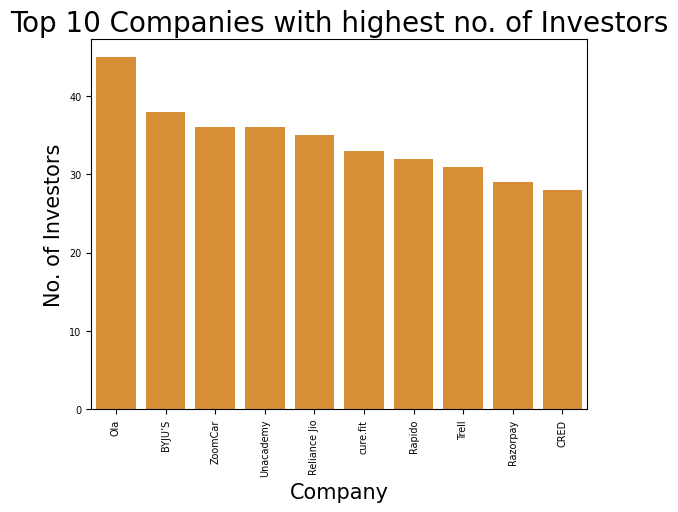

In [46]:
sns.barplot(x=a2,y=a1,data=startup_df, color='#F0921C'  )
plt.xticks(rotation='vertical')
plt.title('Top 10 Companies with highest no. of Investors',size=20)
plt.xlabel('Company',size=15)
plt.ylabel('No. of Investors',size=15)
plt.tick_params(labelsize='x-small')